In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re

from collections import Counter

import nltk

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from sklearn import feature_extraction
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
fox_covid_cleaned = pd.read_csv (r'C:\Users\zach\fox_covid_cleaned.csv')
fox_covid_cleaned.head()

Unnamed: 0                                              title  \
0           0  COVID loneliness crisis – here's how you can f...   
1           1  Republicans go for kill shot on COVID transpor...   
2           2  10 biggest COVID mistakes – Americans deserve ...   
3           3  Lara Trump slams Biden for mask mandates based...   
4           4  Novak Djokovic, Russian players expected to co...   

                 byline                 date  \
0  Nicole Saphier, M.D.  2022-03-15 14:00:00   
1           Tyler Olson  2022-03-15 14:09:00   
2      Dr. Marty Makary  2022-03-16 05:00:00   
3        Fox News Staff  2022-03-16 08:23:00   
4      Associated Press  2022-03-16 09:39:00   

                                             content month_year  
0    close     video   cdc has done a ‘disservice...    2022-03  
1    close     video   fox news flash top headlin...    2022-03  
2    close     video   dr. makary: covid virus 'b...    2022-03  
3    close     video   lara trump rips biden for ...    2022-03  
4    close     video   fox news flash top headlin...    2022-03

In [3]:
fox_covid_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  567 non-null    int64 
 1   title       567 non-null    object
 2   byline      567 non-null    object
 3   date        567 non-null    object
 4   content     567 non-null    object
 5   month_year  567 non-null    object
dtypes: int64(1), object(5)
memory usage: 26.7+ KB


In [4]:
fox_ukraine_cleaned = pd.read_csv (r'C:\Users\zach\fox_ukraine_cleaned.csv')
fox_ukraine_cleaned.head()

Unnamed: 0                                              title  \
0           0  Mariupol police officer pleads for help from B...   
1           1  Hannity warns of 'dangerous' tipping point in ...   
2           2  George W. Bush and Bill Clinton visit Ukrainia...   
3           3  Putin sparks fears of new 'Red Terror' in 'Sta...   
4           4  Mickey Rourke says Russia-Ukraine war is a 'ni...   

               byline                 date  \
0    Associated Press  2022-03-19 16:39:00   
1      Fox News Staff  2022-03-19 01:28:00   
2  Andrew Mark Miller  2022-03-18 18:14:00   
3        Michael Ruiz  2022-03-18 20:33:00   
4    Lauryn Overhultz  2022-03-19 00:54:00   

                                             content month_year  
0    close     video   marine veteran travels to ...    2022-03  
1    close     video   hannity: the world is faci...    2022-03  
2    close     video   zelenskyy 'shaming the wes...    2022-03  
3    close     video   putin a 'madman': rep. mee...    2022-03  
4    close     video   fox news flash top enterta...    2022-03

In [5]:
fox_ukraine_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1989 non-null   int64 
 1   title       1989 non-null   object
 2   byline      1989 non-null   object
 3   date        1989 non-null   object
 4   content     1989 non-null   object
 5   month_year  1989 non-null   object
dtypes: int64(1), object(5)
memory usage: 93.4+ KB


setting indexes prior to join

In [6]:
fox_covid_cleaned.set_index('month_year').head()

Unnamed: 0                                              title  \
month_year                                                                  
2022-03              0  COVID loneliness crisis – here's how you can f...   
2022-03              1  Republicans go for kill shot on COVID transpor...   
2022-03              2  10 biggest COVID mistakes – Americans deserve ...   
2022-03              3  Lara Trump slams Biden for mask mandates based...   
2022-03              4  Novak Djokovic, Russian players expected to co...   

                          byline                 date  \
month_year                                              
2022-03     Nicole Saphier, M.D.  2022-03-15 14:00:00   
2022-03              Tyler Olson  2022-03-15 14:09:00   
2022-03         Dr. Marty Makary  2022-03-16 05:00:00   
2022-03           Fox News Staff  2022-03-16 08:23:00   
2022-03         Associated Press  2022-03-16 09:39:00   

                                                      content  
month_year                                                     
2022-03       close     video   cdc has done a ‘disservice...  
2022-03       close     video   fox news flash top headlin...  
2022-03       close     video   dr. makary: covid virus 'b...  
2022-03       close     video   lara trump rips biden for ...  
2022-03       close     video   fox news flash top headlin...

In [7]:
fox_ukraine_cleaned.set_index('month_year').head()

Unnamed: 0                                              title  \
month_year                                                                  
2022-03              0  Mariupol police officer pleads for help from B...   
2022-03              1  Hannity warns of 'dangerous' tipping point in ...   
2022-03              2  George W. Bush and Bill Clinton visit Ukrainia...   
2022-03              3  Putin sparks fears of new 'Red Terror' in 'Sta...   
2022-03              4  Mickey Rourke says Russia-Ukraine war is a 'ni...   

                        byline                 date  \
month_year                                            
2022-03       Associated Press  2022-03-19 16:39:00   
2022-03         Fox News Staff  2022-03-19 01:28:00   
2022-03     Andrew Mark Miller  2022-03-18 18:14:00   
2022-03           Michael Ruiz  2022-03-18 20:33:00   
2022-03       Lauryn Overhultz  2022-03-19 00:54:00   

                                                      content  
month_year                                                     
2022-03       close     video   marine veteran travels to ...  
2022-03       close     video   hannity: the world is faci...  
2022-03       close     video   zelenskyy 'shaming the wes...  
2022-03       close     video   putin a 'madman': rep. mee...  
2022-03       close     video   fox news flash top enterta...

Joining dataframes at the indexes

In [8]:
fox_combined = pd.concat([fox_covid_cleaned,fox_ukraine_cleaned], sort=False)
fox_combined.head()

Unnamed: 0                                              title  \
0           0  COVID loneliness crisis – here's how you can f...   
1           1  Republicans go for kill shot on COVID transpor...   
2           2  10 biggest COVID mistakes – Americans deserve ...   
3           3  Lara Trump slams Biden for mask mandates based...   
4           4  Novak Djokovic, Russian players expected to co...   

                 byline                 date  \
0  Nicole Saphier, M.D.  2022-03-15 14:00:00   
1           Tyler Olson  2022-03-15 14:09:00   
2      Dr. Marty Makary  2022-03-16 05:00:00   
3        Fox News Staff  2022-03-16 08:23:00   
4      Associated Press  2022-03-16 09:39:00   

                                             content month_year  
0    close     video   cdc has done a ‘disservice...    2022-03  
1    close     video   fox news flash top headlin...    2022-03  
2    close     video   dr. makary: covid virus 'b...    2022-03  
3    close     video   lara trump rips biden for ...    2022-03  
4    close     video   fox news flash top headlin...    2022-03

Text(0, 0.5, 'count')

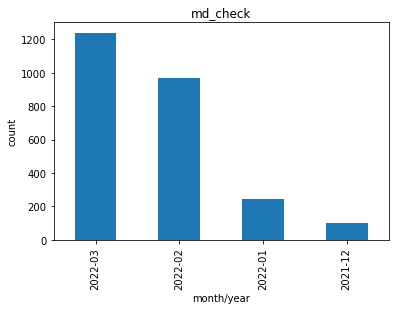

In [9]:
md_check = fox_combined['month_year'].value_counts().plot(kind='bar')
md_check.set_title("md_check")
md_check.set_xlabel("month/year")
md_check.set_ylabel("count")

Exporting for Lexical Analysis

In [10]:
fox_combined.to_csv (r'C:\Users\zach\fox_combined.csv', header=True)

Creating a wordcloud to show change in headlines over the timeframe

In [11]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords += ['the', 'says', 'say', 'a'] # add custom stopwords
stopwords_tokenized = nltk.word_tokenize(' '.join(stopwords))

mask = np.array(Image.open(r'C:\Users\zach\Images\Foxlogo1v2.png'))

def process(text):
    tokens = []
    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            token = word.lower().replace("'", "") # put words like 'she and she as one
            if ('covid-19' in token) or ('coronavirus' in token): # publications use different terms for covid
                tokens.append('covid') # normalize all the mentions since this is a crucial topic as of now
            else:
                tokens.append(token)
    tokens_filtered = [t for t in tokens 
                       if re.search('[a-zA-Z]', t) and t not in stopwords_tokenized]
    return tokens_filtered
  
def gen_wc(bag, name=''):
    tokens = process(bag)
    plt.figure(figsize=(20,10), dpi=800)
    wc = WordCloud(background_color='#002885', mask=mask, color_func=lambda *args, **kwargs: 'white',
                   width=1000, height=500, random_state=42, max_words=600, repeat=False) #other options like max_font_size=, max_words= 
    wordcloud = wc.generate_from_text(' '.join(tokens))
    plt.imshow(wordcloud, interpolation="nearest", aspect="equal")
    plt.axis("off")
    plt.title('Fox news in Headlines-{}'.format(name))
    plt.savefig('headline_wc_{}'.format(name)+'.png', figsize=(20,10), dpi=800)
    plt.show()

# generate word cloud for each month
for time in fox_combined['month_year'].unique():
    fox_combined_subset = fox_combined[fox_combined['month_year']==time].copy()
    bag = fox_combined_subset['title'].str.cat(sep = ' ')
    gen_wc(bag, name=time)

C:\Users\zach\AppData\Local\Temp\ipykernel_12220\728551196.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('headline_wc_{}'.format(name)+'.png', figsize=(20,10), dpi=800)


Creating Bigrams to observe lexical differences and another way to show change in headlines overtime.

In [12]:
out = []
for title in list(fox_combined['title']):
    out.append(nltk.word_tokenize(title))
bi = []
for title_words in out:
    bi += nltk.bigrams(title_words)
Counter(bi).most_common()

[(('in', 'Ukraine'), 122),
 (('Biden', "'s"), 103),
 (('Russia-Ukraine', 'war'), 91),
 (('war', ':'), 86),
 (('’', 's'), 79),
 ((',', "'"), 75),
 (('Russia', "'s"), 75),
 (('Russian', 'invasion'), 70),
 (("'", ':'), 69),
 (('of', 'Ukraine'), 69),
 (('Putin', "'s"), 66),
 (('Ukraine', ','), 62),
 (('Ukraine', ':'), 62),
 (('of', 'the'), 58),
 (('Ukraine', 'invasion'), 58),
 (('on', 'Ukraine'), 57),
 (('to', 'Ukraine'), 57),
 (('Ukraine', "'s"), 56),
 (('Ukraine', 'war'), 51),
 (('invasion', ':'), 51),
 ((':', 'Biden'), 49),
 (('invasion', 'of'), 48),
 (('White', 'House'), 47),
 (("'", 'in'), 43),
 (('mask', 'mandates'), 42),
 (("'", 'to'), 41),
 (("'", 'for'), 41),
 (('Biden', 'to'), 40),
 (('Biden', 'admin'), 39),
 (('mask', 'mandate'), 38),
 ((':', "'"), 38),
 (('Russia', ','), 38),
 ((':', 'report'), 37),
 (("'", 'I'), 32),
 (('North', 'Korea'), 32),
 (('State', 'of'), 31),
 (('for', 'Ukraine'), 31),
 (('out', 'of'), 30),
 (("'", 'of'), 30),
 (('the', 'Union'), 29),
 (('in', 'the'), 